In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Histogram Equalization

이미지 픽셀 값 분포를 더 넓게 확장하여 이미지의 대비를 향상 

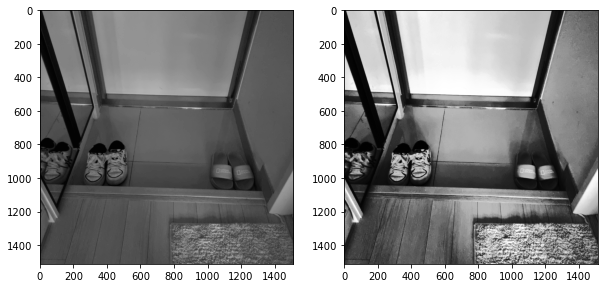

In [6]:
def histogram_equalization(image_path):
    # Read the image in grayscale
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(gray_image)
    
    return equalized_image

gray_image = cv2.imread("./data/h1.jpg", cv2.IMREAD_GRAYSCALE)
equalized_img = histogram_equalization("./data/h1.jpg")

plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(gray_image,cmap='gray')

plt.subplot(122)
plt.imshow(equalized_img,cmap='gray')


## Histogram Matching 

한 이미지의 히스토그램을 다른 이미지의 히스토그램과 비슷하게 조정

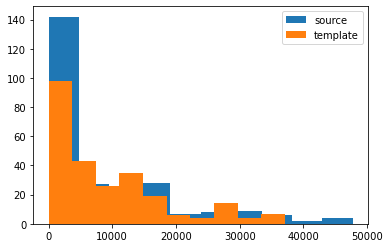

In [20]:
# 원본 이미지의 누적 히스토그램 계산
source_hist, _ = np.histogram(source_image.flatten(), 256, [0,256])
plt.hist(source_hist,label="source")

# 목표 이미지의 누적 히스토그램 계산
template_hist, _ = np.histogram(template_image.flatten(), 256, [0,256])
plt.hist(template_hist,label="template")

plt.legend()
plt.show()

[[155 155 155 ...  81  81  81]
 [155 155 155 ...  74  79  80]
 [154 154 155 ...  81  80  82]
 ...
 [ 86  86  85 ...  63  63  63]
 [ 85  85  83 ...  67  63  65]
 [ 85  87  86 ...  63  60  63]] (1512, 1512)


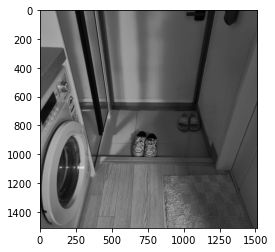

In [29]:
source_cdf = np.cumsum(source_hist) / source_hist.sum()
template_cdf = np.cumsum(template_hist) / template_hist.sum()

# 원본 이미지 각 픽셀값 r_k에 대해, 목표 이미지의 히스토그램에서 
# 해당하는 누적 확률이 같아지는 픽셀값 z_k를 찾는다

lut = np.zeros(256)
for i in range(256):
    idx = np.abs(template_cdf - source_cdf[i]).argmin()
    lut[i] = idx
# print(lut)

# G(r_k) = z_j where H_r(r_k) ~~ H_z(z_j)


# 원본 이미지 각 픽셀을 새로운 값으로 매핑 G(r_k)
result = lut[source_image.flatten()].reshape(source_image.shape).astype(np.uint8)

print(result, result.shape)
plt.imshow(result, cmap='gray')

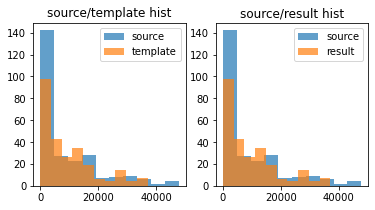

In [44]:
# 원본 이미지의 누적 히스토그램 계산
plt.figure(figsize=(6, 3))

plt.subplot(121)
source_hist, _ = np.histogram(source_image.flatten(), 256, [0,256])
plt.hist(source_hist,label="source", alpha=0.7)

# 목표 이미지의 누적 히스토그램 계산
template_hist, _ = np.histogram(template_image.flatten(), 256, [0,256])
plt.hist(template_hist,label="template", alpha=0.7)

plt.legend()
plt.title("source/template hist")

plt.subplot(122)
plt.hist(source_hist,label="source", alpha=0.7)
result_hist, _ = np.histogram(result.flatten(), 256, [0,256])
plt.hist(template_hist,label="result", alpha=0.7)


plt.legend()
plt.title("source/result hist")

plt.show()

In [8]:
def histogram_matching(source, template):
    """
    Adjust the pixel values of a grayscale image such that its histogram
    matches that of a target image
    """
    # Calculate the histogram of both images
    source_hist, _ = np.histogram(source.flatten(), 256, [0,256])
    template_hist, _ = np.histogram(template.flatten(), 256, [0,256])

    # Calculate the cumulative distribution function for both images
    source_cdf = np.cumsum(source_hist) / source_hist.sum()
    template_cdf = np.cumsum(template_hist) / template_hist.sum()

    # Create a look-up table to map pixel values from source to template
    lut = np.zeros(256)
    for i in range(256):
        idx = np.abs(template_cdf - source_cdf[i]).argmin()
        lut[i] = idx

    # Map the source image pixels to the template histogram
    result = lut[source.flatten()].reshape(source.shape).astype(np.uint8)
    return result

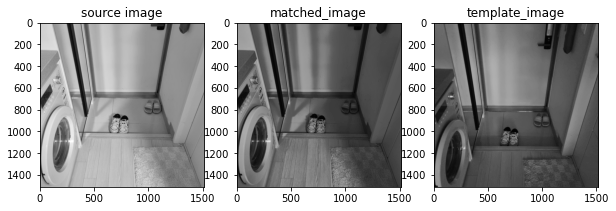

In [13]:
# 이미지 로드
source_image = cv2.imread('./data/hh2.jpg', cv2.IMREAD_GRAYSCALE)
template_image = cv2.imread('./data/hh1.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 10))

# 히스토그램 매칭 수행
matched_image = histogram_matching(source_image, template_image)

plt.subplot(131)
plt.title("source image")
plt.imshow(source_image, cmap='gray')

plt.subplot(132)
plt.title("matched_image")
plt.imshow(matched_image, cmap='gray')
plt.subplot(133)

plt.title("template_image")
plt.imshow(template_image, cmap='gray')

plt.show()